In [1]:
print("==========================================")
current_date_time <- format(Sys.time(), "%Y-%m-%d %H:%M:%S")
sprintf("[TIMESTAMP] %s", current_date_time)
print("==========================================")

[1] "=========================================="


[1] "[TIMESTAMP] 2023-09-21 14:47:58"

[1] "=========================================="


In [2]:
SAMPLE_SIZE = 5

# ---------------------- input  ---------------------------      

input_filename_w_path = paste("results/consolidation/", "consolidated_metrics.tsv", sep="")

# ---------------------- output  ---------------------------    

output_filename_w_path = paste("results/consolidation/", "consolidated_metrics_after_r.tsv", sep="")
output_plot_pdf = paste("results/consolidation/", "score_improvement_plot.pdf", sep="")

# (How to) Determine confidence intervals from values

- calculate 95% CI that will be used for reporting
- generate interesting plots that can be used for statistical testing

## Install and load packages required in R

In [3]:
# install packages
print("  begin -- installing R packages")

options(install.packages.compile.from.source = "always")
install.packages("dplyr", repos = getCRANmirrors()[1,"URL"])
install.packages("readr", repos = getCRANmirrors()[1,"URL"])
install.packages("gplots", repos = getCRANmirrors()[1,"URL"])
install.packages("data.table", repos = getCRANmirrors()[1,"URL"])
install.packages("ggplot2", repos = getCRANmirrors()[1,"URL"])
install.packages("stringr", repos = getCRANmirrors()[1,"URL"])
install.packages("car", repos = getCRANmirrors()[1,"URL"])
install.packages("remotes", repos = getCRANmirrors()[1,"URL"])
remotes::install_github("coolbutuseless/ggpattern")

# Note: for Ubuntu, need to install the following dependencies on machine first
#   sudo apt install libudunits2-dev
#   sudo apt-get install libnlopt-dev
#   sudo apt-get install libsqlite3-dev
#   (for nlopt follow instructions at ) https://github.com/stevengj/nlopt
#   (for sf follow instructions at ) https://mapscaping.com/installing-gdal-for-beginners/
# Note: if something like readr has issues, might need to remove the "00LOCK-*" folder where installed
#   (e.g. for Ubuntu) /home/richardvan/R/x86_64-pc-linux-gnu-library/4.3


print("  done  -- installing R packages")

[1] "  begin -- installing R packages"


Installing package into ‘/home/richardvan/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/richardvan/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/richardvan/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/richardvan/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/richardvan/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/richardvan/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/richardvan/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/richardvan/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Skipping install of 'ggpattern' from a github remote, the SHA1 (bc9e4cd1) has not changed since last install.
  Use `force = TRUE` to force installation



[1] "  done  -- installing R packages"


In [4]:
# load packages
print("  begin -- loading packages")

library(dplyr)                  # a powerful and user-friendly package for data manipulation and transformation, 
                                #   providing a consistent and intuitive grammar to efficiently perform common data 
                                #   tasks on data frames and tibbles.  
library(tibble)                 # introduces an improved data frame structure with added features, designed for 
                                #   efficient data manipulation and analysis while offering a more user-friendly 
                                #   and informative output.
library(data.table)             # extends data frames, providing enhanced functionality for handling large datasets, 
                                #   aggregation, joins, and more with concise syntax.
library(readr)                  # for reading and importing data from various file formats, offering fast and 
                                #   memory-efficient data import capabilities into R.


library(gplots)                 # for creating various types of graphical displays and plots, often focusing on 
                                #   multivariate data visualization and graphical representation of complex datasets. 
                                #   This package offers a range of functions to generate informative and customizable 
                                #   plots, particularly for exploratory data analysis and visualization of 
                                #   high-dimensional data.
library(ggplot2)                # data visualization package that utilizes the Grammar of Graphics principles to 
                                #   create customizable and layered plots for effective representation of complex datasets.
library(stringr)                # for working with strings in R, offering a set of easy-to-use functions for string 
                                #   manipulation, pattern matching, and text extraction.
library(car)                    # provides tools for comprehensive linear regression modeling and diagnostics, 
                                #   offering functions for various regression techniques, influential point analysis, 
                                #   and model validation.
library(ggpattern)              # enhances data visualization in ggplot2 by enabling the integration of customizable 
                                #   patterns into plots, adding an extra layer of information to visual representations.

print("  done  -- loading packages")

[1] "  begin -- loading packages"



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




[1] "  done  -- loading packages"


In [5]:
# load table with readr package
# (remember) the # rows total does not include header row

sprintf("  loading  table -- %s", input_filename_w_path)
data <- read_tsv(input_filename_w_path)
print("  finished loading real table")

[1] "  loading  table -- results/consolidation/consolidated_metrics.tsv"

Rows: 72 Columns: 7
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): preprocessing_type, metric
dbl (5): value_1, value_2, value_3, value_4, value_5

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "  finished loading real table"


In [6]:
# preview the top and bottom of the input before processing
head(data, 2)
tail(data, 2)

preprocessing_type,metric,value_1,value_2,value_3,value_4,value_5
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
unscaled_unnormalized_batchcorrected,train_f1_score,0.9849142,0.9864254,0.9864707,0.9802249,0.9872739
unscaled_unnormalized_batchcorrected,train_acc_score,0.9797881,0.9818215,0.9821118,0.9804414,0.9819292


preprocessing_type,metric,value_1,value_2,value_3,value_4,value_5
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
unscaled_unnormalized_batchcorrected_protocoldisea,testSet02_acc_score,0.7531918,0.7302004,0.7390354,0.7276152,0.7563252
unscaled_unnormalized_batchcorrected_protocoldisea,testSet02_mcc_score,0.6979667,0.6591554,0.6702891,0.6803150,0.6736360


## Process the data by determining descriptive statistics for each row

In [7]:
data <- data %>% 
    arrange(desc(row_number())) %>% 
    rowwise %>%                     # need this otherwise the descriptive stats are calculated over everything
    mutate(median = median( c(value_1,value_2,value_3,value_4,value_5) )) %>% 
    mutate(mean   = mean( c(value_1,value_2,value_3,value_4,value_5) )) %>% 
    mutate(sd     = sd( c(value_1,value_2,value_3,value_4,value_5) )) %>% 
    mutate(SE     = sd / sqrt(SAMPLE_SIZE)) %>% 
    mutate(lower95= min(1.0, mean - 2*SE)) %>% 
    mutate(upper95= min(1.0, mean + 2*SE)) %>% 
    mutate(display_text = sprintf("%.2f (%.2f-%.2f)", median, lower95, upper95) )

In [8]:
# preview the top and bottom of the input after processing
head(data, 2)
tail(data, 2)

preprocessing_type,metric,value_1,value_2,value_3,value_4,value_5,median,mean,sd,SE,lower95,upper95,display_text
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
unscaled_unnormalized_batchcorrected_protocoldisea,testSet02_mcc_score,0.6979667,0.6591554,0.6702891,0.6803150,0.6736360,0.6736360,0.6762724,0.01434161,0.006413763,0.6634449,0.6891000,0.67 (0.66-0.69)
unscaled_unnormalized_batchcorrected_protocoldisea,testSet02_acc_score,0.7531918,0.7302004,0.7390354,0.7276152,0.7563252,0.7390354,0.7412736,0.01306497,0.005842833,0.7295879,0.7529592,0.74 (0.73-0.75)


preprocessing_type,metric,value_1,value_2,value_3,value_4,value_5,median,mean,sd,SE,lower95,upper95,display_text
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
unscaled_unnormalized_batchcorrected,train_acc_score,0.9797881,0.9818215,0.9821118,0.9804414,0.9819292,0.9818215,0.9812184,0.001038816,0.0004645725,0.9802892,0.9821475,0.98 (0.98-0.98)
unscaled_unnormalized_batchcorrected,train_f1_score,0.9849142,0.9864254,0.9864707,0.9802249,0.9872739,0.9864254,0.9850618,0.002835253,0.0012679638,0.9825259,0.9875977,0.99 (0.98-0.99)


## Save table data to output

In [9]:
print("  saving table  ")
sprintf("    writing data -- %s", output_filename_w_path)
write_tsv(data, output_filename_w_path)
print(  "    data saved -- ")

[1] "  saving table  "


[1] "    writing data -- results/consolidation/consolidated_metrics_after_r.tsv"

[1] "    data saved -- "


## Load table data (will usually be what output was just, but can change for plots)

In [ ]:
# ---------------------- input for making plots ---------------------------      

input4plots_filename_w_path = output_filename_w_path    # most common choice, continuation of above
# input4plots_filename_w_path = paste("results/consolidation/", "consolidated_metrics_after_r_20230825_batchEffectCombos.tsv", sep="")


In [ ]:
# load table with readr package
sprintf("  loading  table -- %s", input_filename_w_path)
data <- read_tsv(input4plots_filename_w_path)
print("  finished loading real table")

In [ ]:
# preview the top and bottom of the input before processing
head(data, 2)
tail(data, 2)

## Generate an interesting plots using gplots package from biometry

### Plot #1: simple comparison of one case 

In [ ]:
# ## preparing data for ggplot2
data_needed <- data %>% 
    filter (grepl("unscaled_unnormalized_nobatchcorrection|^scaled_unnormalized_batchcorrected", preprocessing_type ))  %>% 
    filter (grepl("testSet02_f1_score", metric )) %>%
    mutate (dataset_type = ifelse (preprocessing_type == "unscaled_unnormalized_nobatchcorrection",
                                    "Original Dataset",
                                    "Modified Dataset")
           ) %>% 
    select(dataset_type, 
           value_1,
           value_2,
           value_3,
           value_4,
           value_5,
           median, 
           lower95, 
           upper95)

p_value_one <- tibble(
  x = c("Original Dataset", 
        "Original Dataset", 
        "Modified Dataset", 
        "Modified Dataset"),
  y = c(0.85,  # bottom left
        0.90,  # top left
        0.90,  # top right
        0.85)  # bottom right
)

# annotation_text_height = -0.4     #(for *s) 11.6 and font to size 8; else 11.8 and font to size 4
# annotation_label = myAnnotationLabel
# annotation_size = 8
# if (myAnnotationLabel == "n.s."){
#   annotation_text_height = -0.25
#   annotation_size = 6
  
# }
myAnnotationLabel = "**"
annotation_text_height = 0.92     #(for *s) 11.6 and font to size 8; else 11.8 and font to size 4
annotation_label = myAnnotationLabel
annotation_size = 8
if (myAnnotationLabel == "n.s."){
  annotation_text_height = -0.25
  annotation_size = 6
  
}

In [ ]:
print(data_needed)

In [ ]:
## using ggplot2 
# (source on bar stripe pattern) https://stackoverflow.com/questions/48487498/adding-patterns-or-textures-to-geom-bar-geom-col-bars

ggplot(data = data_needed, aes(x=dataset_type, y=median)) +
    scale_x_discrete(limits = rev) +   # need to reverse the x-axis order so WT first
    scale_y_continuous(expand = c(0, 0), limits = c(0, 1)) + 
    geom_col_pattern(
                        fill=c("lightgray", "white"),
                        color = "black", 
                        width=0.6, 
                        pattern=c("none", "stripe"),
                    ) +
    geom_errorbar(  aes( ymin = lower95,
                        ymax = upper95),
                    color = "#22292F",
                    width = .25) +
    geom_line(data = p_value_one, aes(x = x, y = y, group = 1)) +
    annotate("text", x = 1.5, y = annotation_text_height,
        label = annotation_label,
        size = annotation_size, 
        color = "#22292F") +
    labs(
        x="", 
        y="Weighted F1-Score") + 
#     ggtitle("Improvement of Weighted F1-Score after Batch Correction and Scaling") + 
    theme_minimal() + 
    theme(
        plot.title = element_text(size = 14,
#                                   face = "italic",
                                  margin = margin(b = 15),
                                  hjust = 0.5
                                ),
#         plot.margin = unit(rep(1, 4), "cm"),
        axis.text = element_text(size = 16, color = "#22292F"),
        axis.title = element_text(size = 16),
        axis.title.x = element_text(margin = margin(t = 15)),
        axis.title.y = element_text(margin = margin(r = 15)),
#         axis.text.y = element_text(margin = margin(r = 5)),
        axis.text.x = element_text(margin = margin(t = 15)),
#         plot.caption = element_text(size = 12, 
#                                     face = "italic",
#                                     color = "#606F7B",
#                                     margin = margin(t = 2)),
        axis.line = element_line(color = "#3D4852"),
        axis.ticks = element_line(color = "#3D4852"),
        panel.grid.major.y = element_blank(),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.y = element_blank()
    ) 

In [ ]:
# save single plot made in ggplot2
ggsave (output_plot_pdf, width = 6, height = 6)


### Plot #2: complex comparison of 15 comparisons (baseline vs all) 

In [97]:
print(data)

# A tibble: 144 × 14
# Rowwise: 
   preprocessing_type      metric value_1 value_2 value_3 value_4 value_5 median
   <chr>                   <chr>    <dbl>   <dbl>   <dbl>   <dbl>   <dbl>  <dbl>
 1 unscaled_unnormalized_… testS…   0.696   0.640   0.656   0.699   0.697  0.696
 2 unscaled_unnormalized_… testS…   0.587   0.568   0.571   0.609   0.610  0.587
 3 unscaled_unnormalized_… testS…   0.808   0.741   0.758   0.804   0.809  0.804
 4 unscaled_unnormalized_… testS…   0.982   0.987   0.987   0.987   0.988  0.987
 5 unscaled_unnormalized_… testS…   0.983   0.988   0.987   0.988   0.989  0.988
 6 unscaled_unnormalized_… testS…   0.984   0.988   0.989   0.989   0.989  0.989
 7 unscaled_unnormalized_… train…   0.983   0.983   0.983   0.983   0.985  0.983
 8 unscaled_unnormalized_… train…   0.981   0.979   0.982   0.985   0.982  0.982
 9 unscaled_unnormalized_… train…   0.985   0.984   0.985   0.984   0.987  0.985
10 unscaled_unnormalized_… testS…   0.470   0.460   0.495   0.502   0.467  0

In [98]:
data_modified <- data %>%   
    filter (grepl("testSet02_f1_score", metric )) %>%
    mutate (scaling_type = 
                case_when(
                        str_detect(preprocessing_type,"unscaled") ~ "Unscaled",
                        TRUE ~ "Scaled"
                    )
           ) %>% 
    mutate (batch_correction_type = 
                case_when(
                        str_detect(preprocessing_type,"batchcorrected") ~ "Batch corrected",
                        TRUE ~ "No batch correction"
                    )
           ) %>% 
    mutate (normalization_type = 
                case_when(
                        str_detect(preprocessing_type,"qntarget") ~ "QN-Target",
                        str_detect(preprocessing_type,"fsqn") ~ "FSQN",
                        str_detect(preprocessing_type,"qn") ~ "QN",
                        TRUE ~ "Unnormalized"
                    )
           ) %>% 
    mutate (figure_order = 
            case_when(
                # Unnormalized cases
                    (
                        scaling_type == "Unscaled" & 
                        batch_correction_type == "No batch correction" &
                        normalization_type == "Unnormalized"
                    ) ~ 1,
                    (
                        scaling_type == "Scaled" & 
                        batch_correction_type == "No batch correction" &
                        normalization_type == "Unnormalized"
                    ) ~ 2,
                    (
                        scaling_type == "Unscaled" & 
                        batch_correction_type == "Batch corrected" &
                        normalization_type == "Unnormalized"
                    ) ~ 3,
                    (
                        scaling_type == "Scaled" & 
                        batch_correction_type == "Batch corrected" &
                        normalization_type == "Unnormalized"
                    ) ~ 4,
                # QN cases
                    (
                        scaling_type == "Unscaled" & 
                        batch_correction_type == "No batch correction" &
                        normalization_type == "QN"
                    ) ~ 5,
                    (
                        scaling_type == "Scaled" & 
                        batch_correction_type == "No batch correction" &
                        normalization_type == "QN"
                    ) ~ 6,
                    (
                        scaling_type == "Unscaled" & 
                        batch_correction_type == "Batch corrected" &
                        normalization_type == "QN"
                    ) ~ 7,
                    (
                        scaling_type == "Scaled" & 
                        batch_correction_type == "Batch corrected" &
                        normalization_type == "QN"
                    ) ~ 8,
                # QN-Target cases
                    (
                        scaling_type == "Unscaled" & 
                        batch_correction_type == "No batch correction" &
                        normalization_type == "QN-Target"
                    ) ~ 9,
                    (
                        scaling_type == "Scaled" & 
                        batch_correction_type == "No batch correction" &
                        normalization_type == "QN-Target"
                    ) ~ 10,
                    (
                        scaling_type == "Unscaled" & 
                        batch_correction_type == "Batch corrected" &
                        normalization_type == "QN-Target"
                    ) ~ 11,
                    (
                        scaling_type == "Scaled" & 
                        batch_correction_type == "Batch corrected" &
                        normalization_type == "QN-Target"
                    ) ~ 12,
                # FSQN cases
                    (
                        scaling_type == "Unscaled" & 
                        batch_correction_type == "No batch correction" &
                        normalization_type == "FSQN"
                    ) ~ 13,
                    (
                        scaling_type == "Scaled" & 
                        batch_correction_type == "No batch correction" &
                        normalization_type == "FSQN"
                    ) ~ 14,
                    (
                        scaling_type == "Unscaled" & 
                        batch_correction_type == "Batch corrected" &
                        normalization_type == "FSQN"
                    ) ~ 15,
                    (
                        scaling_type == "Scaled" & 
                        batch_correction_type == "Batch corrected" &
                        normalization_type == "FSQN"
                    ) ~ 16,
                
                
                
                    TRUE ~ 20
                )
       ) %>% 
    select(
#            preprocessing_type,   
           normalization_type,
           figure_order,
           scaling_type, 
           batch_correction_type,
           median, 
           lower95, 
           upper95,
           value_1,
           value_2,
           value_3,
           value_4,
           value_5
    ) 



#set specific column as row names/index and then remove that column
data_modified <- data_modified %>% 
    column_to_rownames(., var = 'figure_order')

#sort by row names from smallest to largest
data_modified <- data_modified[order(as.numeric(row.names(data_modified))), ]
# data_modified.reset_index()


In [99]:
class(data_modified)

print(data_modified)

[1] "data.frame"

   normalization_type scaling_type batch_correction_type    median   lower95
1        Unnormalized     Unscaled   No batch correction 0.8039872 0.7551203
2        Unnormalized       Scaled   No batch correction 0.6470029 0.6281099
3        Unnormalized     Unscaled       Batch corrected 0.5600039 0.5377889
4        Unnormalized       Scaled       Batch corrected 0.3819931 0.1471920
5                  QN     Unscaled   No batch correction 0.7458258 0.6142723
6                  QN       Scaled   No batch correction 0.6153807 0.6003070
7                  QN     Unscaled       Batch corrected 0.5661452 0.5489417
8                  QN       Scaled       Batch corrected 0.5771764 0.5514645
9           QN-Target     Unscaled   No batch correction 0.7868632 0.6362645
10          QN-Target       Scaled   No batch correction 0.6382970 0.6286412
11          QN-Target     Unscaled       Batch corrected 0.5721985 0.5486330
12          QN-Target       Scaled       Batch corrected 0.5671840 0.5468568

In [100]:
# prep code for showing the line above comparisons with */**/***; only on the significant cases
annotation_size = 6   

p_value_line_01 <- tibble(
  x = c(1,    # the original dataset
        1,    # the original dataset
        3,    # the dataset compared to
        3),   # the dataset compared to
  y = c(0.82,  # bottom left
        0.85,  # top left
        0.85,  # top right
        0.82)  # bottom right
)
annotation_label_01 = "*"
annotation_x_pos_01 = 2     
annotation_y_pos_01 = 0.865  # should be (top left/right) + 0.015    

p_value_line_02 <- tibble(
  x = c(1,    # the original dataset
        1,    # the original dataset
        15,    # the dataset compared to
        15),   # the dataset compared to
  y = c(0.89,  # bottom left             (.07 higher than prev)
        0.92,  # top left                (+0.03)
        0.92,  # top right               (+0.03)
        0.82)  # bottom right            (same)
)
annotation_label_02 = "*"
annotation_x_pos_02 = 7.5     
annotation_y_pos_02 = 0.935  # should be (top left/right) + 0.015    


# p_value_line_03 <- tibble(
#   x = c(1,    # the original dataset
#         1,    # the original dataset
#         16,    # the dataset compared to
#         16),   # the dataset compared to
#   y = c(0.96,  # bottom left             (.07 higher than prev)
#         0.99,  # top left                (+0.03)
#         0.99,  # top right               (+0.03)
#         0.82)  # bottom right            (same)
# )
# annotation_label_03 = "*"
# annotation_x_pos_03 = 8.5     
# annotation_y_pos_03 = 1.005  # should be (top left/right) + 0.015    

# p_value_line_04 <- tibble(
#   x = c(1,    # the original dataset
#         1,    # the original dataset
#         16,    # the dataset compared to
#         16),   # the dataset compared to
#   y = c(1.03,  # bottom left             (.07 higher than prev)
#         1.06,  # top left                (+0.03)
#         1.06,  # top right               (+0.03)
#         0.82)  # bottom right            (same)
# )
# annotation_label_04 = "*"
# annotation_x_pos_04 = 8.5     
# annotation_y_pos_04 = 1.075  # should be (top left/right) + 0.02    


# p_value_line_05 <- tibble(
#   x = c(1,    # the original dataset
#         1,    # the original dataset
#         11,    # the dataset compared to
#         11),   # the dataset compared to
#   y = c(1.10,  # bottom left             (.07 higher than prev)
#         1.13,  # top left                (+0.03)
#         1.13,  # top right               (+0.03)
#         0.82)  # bottom right            (same)
# )
# annotation_label_05 = "**"
# annotation_x_pos_05 = 6     
# annotation_y_pos_05 = 1.145  # should be (top left/right) + 0.015    

# p_value_line_06 <- tibble(
#   x = c(1,    # the original dataset
#         1,    # the original dataset
#         12,    # the dataset compared to
#         12),   # the dataset compared to
#   y = c(1.17,  # bottom left             (.07 higher than prev)
#         1.20,  # top left                (+0.03)
#         1.20,  # top right               (+0.03)
#         0.82)  # bottom right            (same)
# )
# annotation_label_06 = "**"
# annotation_x_pos_06 = 6.5     
# annotation_y_pos_06 = 1.215  # should be (top left/right) + 0.02    


# p_value_line_07 <- tibble(
#   x = c(1,    # the original dataset
#         1,    # the original dataset
#         15,    # the dataset compared to
#         15),   # the dataset compared to
#   y = c(1.24,  # bottom left             (.07 higher than prev)
#         1.27,  # top left                (+0.03)
#         1.27,  # top right               (+0.03)
#         0.82)  # bottom right            (same)
# )
# annotation_label_07 = "*"
# annotation_x_pos_07 = 8     
# annotation_y_pos_07 = 1.285  # should be (top left/right) + 0.015    


# p_value_line_08 <- tibble(
#   x = c(1,    # the original dataset
#         1,    # the original dataset
#         16,    # the dataset compared to
#         16),   # the dataset compared to
#   y = c(1.31,  # bottom left             (.07 higher than prev)
#         1.34,  # top left                (+0.03)
#         1.34,  # top right               (+0.03)
#         0.82)  # bottom right            (same)
# )
# annotation_label_08 = "*"
# annotation_x_pos_08 = 8.5     
# annotation_y_pos_08 = 1.355  # should be (top left/right) + 0.02    

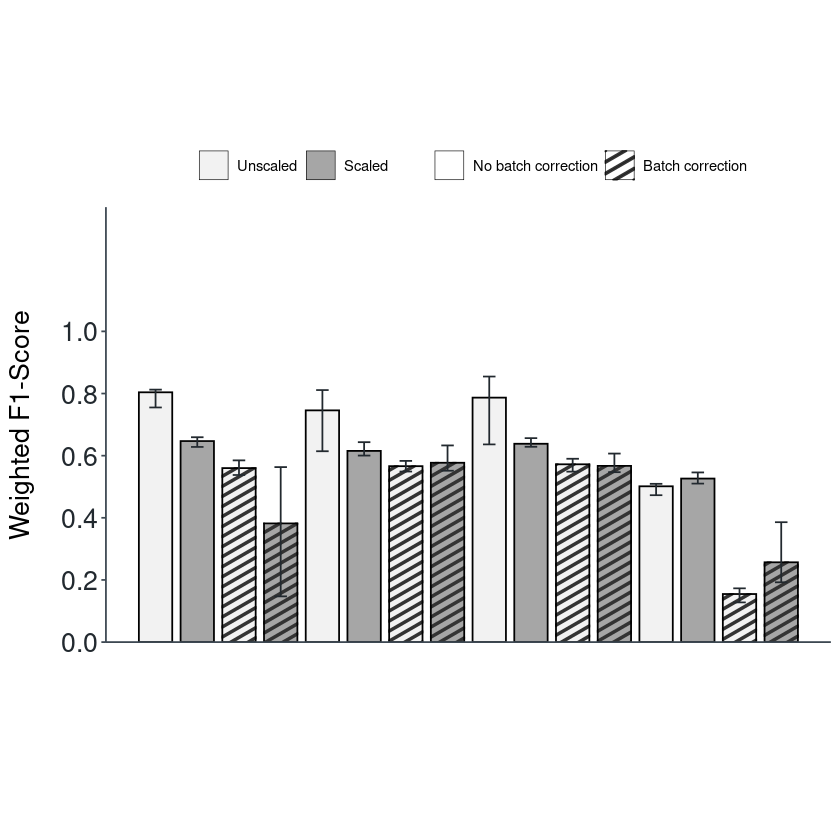

In [104]:
ggplot(data = data_modified, aes(x=1:nrow(data_modified), y=median)) +
#     geom_col() +
    geom_col_pattern(
                        width=0.8, 
                        color = "black", 
                        aes(
                            fill=c(    "gray65", "gray95","gray65", "gray95",
                                       "gray65", "gray95","gray65", "gray95",
                                       "gray65", "gray95","gray65", "gray95",
                                       "gray65", "gray95","gray65", "gray95"
                              ),
                            pattern=c( "none", "none","stripe", "stripe",
                                       "none", "none","stripe", "stripe",
                                       "none", "none","stripe", "stripe",
                                       "none", "none","stripe", "stripe"
                              )
                        ),
                        pattern_fill = "black",
                        pattern_spacing = 0.02,
                        show.legend = TRUE,
                    ) +
    scale_y_continuous(expand = c(0, 0), limits = c(0, 1.4), breaks = seq(0,1,0.2)) + 
    geom_errorbar(  aes( ymin = lower95,
                         ymax = upper95),
                    color = "#22292F",
                    width = .3) +

    # for legend
    # (source, know to put var into aes to map) https://stackoverflow.com/questions/40967101/why-ggplot2-legend-not-show-in-the-graph
    scale_fill_manual(labels=c("Unscaled","Scaled"), values = c("gray95","gray65")) +
    scale_pattern_manual(labels=c("No batch correction","Batch correction"), values = c("none","stripe")) +

    guides( # for overriding label entities
                # the left legend
                fill = guide_legend(override.aes = list(pattern = "none")),       

                # the right legend
                pattern = guide_legend(override.aes = list(fill = "white"))  
    ) +

    # # the p value line and annotation addition
    # geom_line(data = p_value_line_01, aes(x = x, y = y, group = 1)) +
    # annotate("text", x = annotation_x_pos_01, y = annotation_y_pos_01,
    #     label = annotation_label_01,
    #     size = annotation_size) +

    # geom_line(data = p_value_line_02, aes(x = x, y = y, group = 1)) +
    # annotate("text", x = annotation_x_pos_02, y = annotation_y_pos_02,
    #     label = annotation_label_02,
    #     size = annotation_size) +

    # geom_line(data = p_value_line_03, aes(x = x, y = y, group = 1)) +
    # annotate("text", x = annotation_x_pos_03, y = annotation_y_pos_03,
    #     label = annotation_label_03,
    #     size = annotation_size) +

    # geom_line(data = p_value_line_04, aes(x = x, y = y, group = 1)) +
    # annotate("text", x = annotation_x_pos_04, y = annotation_y_pos_04,
    #     label = annotation_label_04,
    #     size = annotation_size) +

#     geom_line(data = p_value_line_05, aes(x = x, y = y, group = 1)) +
#     annotate("text", x = annotation_x_pos_05, y = annotation_y_pos_05,
#         label = annotation_label_05,
#         size = annotation_size) +

#     geom_line(data = p_value_line_06, aes(x = x, y = y, group = 1)) +
#     annotate("text", x = annotation_x_pos_06, y = annotation_y_pos_06,
#         label = annotation_label_06,
#         size = annotation_size) +

#     geom_line(data = p_value_line_07, aes(x = x, y = y, group = 1)) +
#     annotate("text", x = annotation_x_pos_07, y = annotation_y_pos_07,
#         label = annotation_label_07,
#         size = annotation_size) +

#     geom_line(data = p_value_line_08, aes(x = x, y = y, group = 1)) +
#     annotate("text", x = annotation_x_pos_08, y = annotation_y_pos_08,
#         label = annotation_label_08,
#         size = annotation_size) +


    labs(
        x="", 
        y="Weighted F1-Score", 
        fill="",
        pattern=""
    ) +


    theme_minimal() + 
    theme(
        aspect.ratio = 3/5,
#         plot.title = element_text(size = 14,
# #                                   face = "italic",
#                                   margin = margin(b = 15),
#                                   hjust = 0.5
#                                 ),
#         plot.margin = unit(rep(1, 4), "cm"),
        axis.text = element_text(size = 16, color = "#22292F"),
        axis.title = element_text(size = 16),
        axis.title.x = element_text(margin = margin(t = 15)),
        axis.title.y = element_text(size = 16, margin = margin(r = 15)),
#         axis.text.y = element_text(margin = margin(r = 5)),
        axis.text.x = element_blank(),
#         plot.caption = element_text(size = 12, 
#                                     face = "italic",
#                                     color = "#606F7B",
#                                     margin = margin(t = 2)),
        axis.line = element_line(color = "#3D4852"),
        axis.ticks.y = element_line(color = "#3D4852"),
        
        legend.position = "top",
        

        panel.grid.major.y = element_blank(),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.y = element_blank(),
        panel.grid.minor.x = element_blank()
    ) 

In [105]:
# save single plot made in ggplot2
ggsave (output_plot_pdf, width = 10, height = 6)

### Plot #3: complex comparison of 4 comparisons (baseline vs 4 cases) for batch effect algorithms

In [10]:
data

preprocessing_type,metric,value_1,value_2,value_3,value_4,value_5,median,mean,sd,SE,lower95,upper95,display_text
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
unscaled_unnormalized_batchcorrected_protocoldisea,testSet02_mcc_score,0.6979667,0.6591554,0.6702891,0.6803150,0.6736360,0.6736360,0.6762724,0.014341610,0.0064137628,0.6634449,0.6891000,0.67 (0.66-0.69)
unscaled_unnormalized_batchcorrected_protocoldisea,testSet02_acc_score,0.7531918,0.7302004,0.7390354,0.7276152,0.7563252,0.7390354,0.7412736,0.013064971,0.0058428326,0.7295879,0.7529592,0.74 (0.73-0.75)
unscaled_unnormalized_batchcorrected_protocoldisea,testSet02_f1_score,0.7400412,0.7059389,0.7132413,0.7253260,0.7275922,0.7253260,0.7224279,0.013243682,0.0059227549,0.7105824,0.7342734,0.73 (0.71-0.73)
unscaled_unnormalized_batchcorrected_protocoldisea,testSet01_mcc_score,0.9825740,0.9853589,0.9867496,0.9874549,0.9895403,0.9867496,0.9863355,0.002588335,0.0011575386,0.9840204,0.9886506,0.99 (0.98-0.99)
unscaled_unnormalized_batchcorrected_protocoldisea,testSet01_acc_score,0.9839583,0.9871141,0.9884154,0.9892322,0.9903486,0.9884154,0.9878137,0.002457301,0.0010989385,0.9856159,0.9900116,0.99 (0.99-0.99)
unscaled_unnormalized_batchcorrected_protocoldisea,testSet01_f1_score,0.9842506,0.9867588,0.9879850,0.9886185,0.9905132,0.9879850,0.9876252,0.002323562,0.0010391287,0.9855470,0.9897035,0.99 (0.99-0.99)
unscaled_unnormalized_batchcorrected_protocoldisea,train_mcc_score,0.9834380,0.9851722,0.9851815,0.9782110,0.9860537,0.9851722,0.9836113,0.003164667,0.0014152821,0.9807807,0.9864419,0.99 (0.98-0.99)
unscaled_unnormalized_batchcorrected_protocoldisea,train_acc_score,0.9797881,0.9818215,0.9821118,0.9804414,0.9819292,0.9818215,0.9812184,0.001038816,0.0004645725,0.9802892,0.9821475,0.98 (0.98-0.98)
unscaled_unnormalized_batchcorrected_protocoldisea,train_f1_score,0.9849142,0.9864254,0.9864707,0.9802249,0.9872739,0.9864254,0.9850618,0.002835253,0.0012679638,0.9825259,0.9875977,0.99 (0.98-0.99)


In [26]:
data_modified <- data %>%   
    filter (grepl("testSet02_f1_score", metric )) %>%
    mutate (batch_correction_type = 

                # batch correction combos  
                case_when(
                        str_detect(preprocessing_type,"_protocol_") ~ "Batch corrected (Protocol)",
                        str_detect(preprocessing_type,"_disease_") ~ "Batch corrected (Disease)",
                        str_detect(preprocessing_type,"_consortium_") ~ "Batch corrected (Consortium)",
                        str_detect(preprocessing_type,"_protocoldisea") ~ "Batch corrected (Protocol+Disease)",
                        str_detect(preprocessing_type,"_protocolconso") ~ "Batch corrected (Protocol+Consortium)",
                        str_detect(preprocessing_type,"_diseaseconsor") ~ "Batch corrected (Disease+Consortium)",
                        str_detect(preprocessing_type,"_batchcorrected_none") ~ "No batch correction",
                        TRUE ~ "Batch corrected (all 3)"
                    )

           ) %>% 
    mutate (normalization_type = 
                case_when(
                        TRUE ~ "Unnormalized"
                    )
           ) %>% 
    mutate (figure_order = 
            case_when(

      
                # batch correction combos individual 
                (batch_correction_type == "No batch correction" ) ~ 1,
                (batch_correction_type == "Batch corrected (Protocol)") ~ 2,
                (batch_correction_type == "Batch corrected (Disease)") ~ 3,
                (batch_correction_type == "Batch corrected (Consortium)") ~ 4,
                (batch_correction_type == "Batch corrected (Protocol+Disease)") ~ 5,
                (batch_correction_type == "Batch corrected (Protocol+Consortium)") ~ 6,
                (batch_correction_type == "Batch corrected (Disease+Consortium)") ~ 7,
                (batch_correction_type == "Batch corrected (all 3)" ) ~ 8,
                
                TRUE ~ 20
            )
       ) %>% 
    select(
           figure_order,
           batch_correction_type,
           median, 
           lower95, 
           upper95,
           value_1,
           value_2,
           value_3,
           value_4,
           value_5
    ) 



#set specific column as row names/index and then remove that column
data_modified <- data_modified %>% 
    column_to_rownames(., var = 'figure_order')

#sort by row names from smallest to largest
data_modified <- data_modified[order(as.numeric(row.names(data_modified))), ]
# data_modified.reset_index()


In [27]:
print(data_modified)

                  batch_correction_type    median   lower95   upper95   value_1
1                   No batch correction 0.7108531 0.6603093 0.7244113 0.7270288
2            Batch corrected (Protocol) 0.6508500 0.6326812 0.6791991 0.6508500
3             Batch corrected (Disease) 0.6943610 0.6434078 0.7085831 0.7012303
4          Batch corrected (Consortium) 0.7077024 0.6510668 0.7269755 0.7077024
5    Batch corrected (Protocol+Disease) 0.7253260 0.7105824 0.7342734 0.7400412
6 Batch corrected (Protocol+Consortium) 0.7366368 0.7292410 0.7487160 0.7562664
7  Batch corrected (Disease+Consortium) 0.7021749 0.6538414 0.7192104 0.7021749
8               Batch corrected (all 3) 0.7600783 0.7468421 0.7701195 0.7708663
    value_2   value_3   value_4   value_5
1 0.6409659 0.6696882 0.7108531 0.7132655
2 0.6448615 0.6253646 0.6630506 0.6955739
3 0.6134774 0.6943610 0.6743133 0.6965953
4 0.6143192 0.6955028 0.7152447 0.7123368
5 0.7059389 0.7132413 0.7253260 0.7275922
6 0.7366368 0.7265501 0.7352

In [30]:
# prep code for showing the line above comparisons with */**/***; only on the significant cases
annotation_size = 6   


# next two are together
p_value_line_02 <- tibble(
  x = c(1,    # the original dataset
        1,    # the original dataset
        6,    # the dataset compared to
        6),   # the dataset compared to
  y = c(0.85,  # bottom left             (.07 higher than prev)
        0.88,  # top left                (+0.03)
        0.88,  # top right               (+0.03)
        0.85)  # bottom right            (same)
)
annotation_label_02 = "*"
annotation_x_pos_02 = 3.5     
annotation_y_pos_02 = 0.895  # should be (top left/right) + 0.015

p_value_line_04 <- tibble(
  x = c(1,    # the original dataset
        1,    # the original dataset
        8,    # the dataset compared to
        8),   # the dataset compared to
  y = c(0.92,  # bottom left             (.07 higher than prev)
        0.95,  # top left                (+0.03)
        0.95,  # top right               (+0.03)
        0.85)  # bottom right            (same)
)
annotation_label_04 = "**"
annotation_x_pos_04 = 4.5     
annotation_y_pos_04 = 0.97  # should be (top left/right) + 0.02    


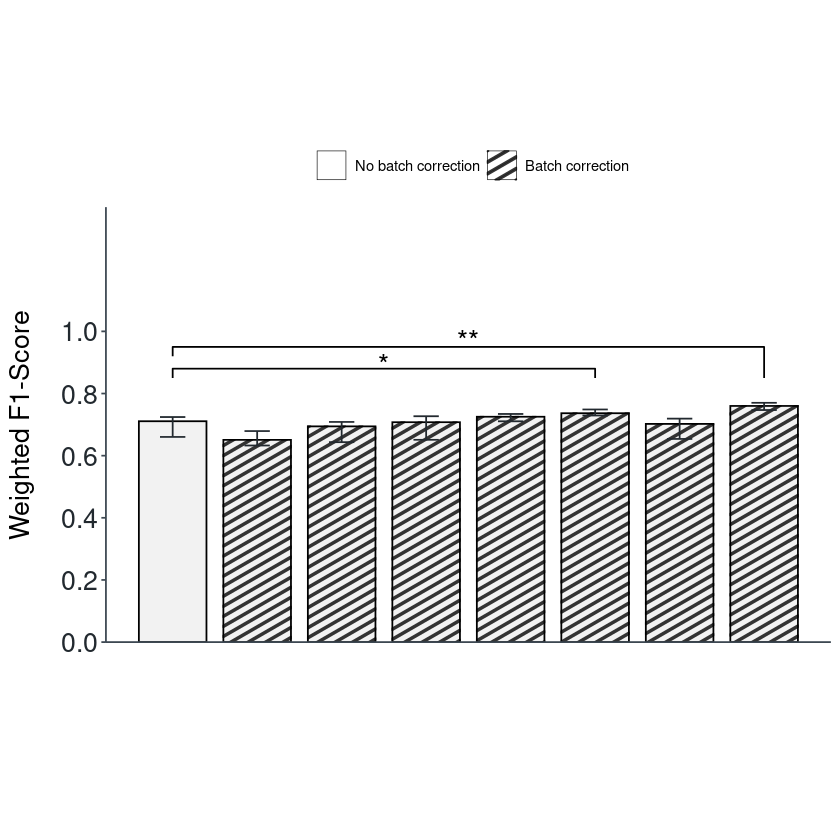

In [31]:
ggplot(data = data_modified, aes(x=1:nrow(data_modified), y=median)) +
    geom_col_pattern(
                        width=0.8, 
                        color = "black", 
                        aes(
                            fill=c(    "gray65","gray65","gray65","gray65","gray65","gray65","gray65","gray65"
                              ),
                            pattern=c( "none", "stripe","stripe", "stripe", "stripe","stripe", "stripe", "stripe"
                              )
                        ),
                        pattern_fill = "black",
                        pattern_spacing = 0.02,
                        show.legend = TRUE,
                    ) +
    scale_y_continuous(expand = c(0, 0), limits = c(0, 1.4), breaks = seq(0,1,0.2)) + 
    geom_errorbar(  aes( ymin = lower95,
                         ymax = upper95),
                    color = "#22292F",
                    width = .3) +

    # for legend
    # (source, know to put var into aes to map) https://stackoverflow.com/questions/40967101/why-ggplot2-legend-not-show-in-the-graph
    scale_fill_manual(labels=c("Unscaled","Scaled"), values = c("gray95","gray65")) +
    scale_pattern_manual(labels=c("No batch correction","Batch correction"), values = c("none","stripe")) +

    guides( # for overriding label entities
                # the left legend
                fill = "none",       

                # the right legend
                pattern = guide_legend(override.aes = list(fill = "white"))  
    ) +

    # # the p value line and annotation addition

    geom_line(data = p_value_line_02, aes(x = x, y = y, group = 1)) +
    annotate("text", x = annotation_x_pos_02, y = annotation_y_pos_02,
        label = annotation_label_02,
        size = annotation_size) +
    geom_line(data = p_value_line_04, aes(x = x, y = y, group = 1)) +
    annotate("text", x = annotation_x_pos_04, y = annotation_y_pos_04,
        label = annotation_label_04,
        size = annotation_size) +


    labs(
        x="", 
        y="Weighted F1-Score", 
        fill="",
        pattern=""
    ) +


    theme_minimal() + 
    theme(
        aspect.ratio = 3/5,
#         plot.title = element_text(size = 14,
# #                                   face = "italic",
#                                   margin = margin(b = 15),
#                                   hjust = 0.5
#                                 ),
#         plot.margin = unit(rep(1, 4), "cm"),
        axis.text = element_text(size = 16, color = "#22292F"),
        axis.title = element_text(size = 16),
        axis.title.x = element_text(margin = margin(t = 15)),
        axis.title.y = element_text(size = 16, margin = margin(r = 15)),
#         axis.text.y = element_text(margin = margin(r = 5)),
        axis.text.x = element_blank(),
#         plot.caption = element_text(size = 12, 
#                                     face = "italic",
#                                     color = "#606F7B",
#                                     margin = margin(t = 2)),
        axis.line = element_line(color = "#3D4852"),
        axis.ticks.y = element_line(color = "#3D4852"),
        
        legend.position = "top",
        

        panel.grid.major.y = element_blank(),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.y = element_blank(),
        panel.grid.minor.x = element_blank()
    ) 

In [32]:
# save single plot made in ggplot2
ggsave (output_plot_pdf, width = 10, height = 6)

### Plot #4: complex comparison of 7 comparisons (baseline vs 7 cases) for batch effect combos

In [11]:
data

preprocessing_type,metric,value_1,value_2,value_3,value_4,value_5,median,mean,sd,SE,lower95,upper95,display_text
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
unscaled_unnormalized_batchcorrected_protocoldisea,testSet02_mcc_score,0.6979667,0.6591554,0.6702891,0.6803150,0.6736360,0.6736360,0.6762724,0.014341610,0.0064137628,0.6634449,0.6891000,0.67 (0.66-0.69)
unscaled_unnormalized_batchcorrected_protocoldisea,testSet02_acc_score,0.7531918,0.7302004,0.7390354,0.7276152,0.7563252,0.7390354,0.7412736,0.013064971,0.0058428326,0.7295879,0.7529592,0.74 (0.73-0.75)
unscaled_unnormalized_batchcorrected_protocoldisea,testSet02_f1_score,0.7400412,0.7059389,0.7132413,0.7253260,0.7275922,0.7253260,0.7224279,0.013243682,0.0059227549,0.7105824,0.7342734,0.73 (0.71-0.73)
unscaled_unnormalized_batchcorrected_protocoldisea,testSet01_mcc_score,0.9825740,0.9853589,0.9867496,0.9874549,0.9895403,0.9867496,0.9863355,0.002588335,0.0011575386,0.9840204,0.9886506,0.99 (0.98-0.99)
unscaled_unnormalized_batchcorrected_protocoldisea,testSet01_acc_score,0.9839583,0.9871141,0.9884154,0.9892322,0.9903486,0.9884154,0.9878137,0.002457301,0.0010989385,0.9856159,0.9900116,0.99 (0.99-0.99)
unscaled_unnormalized_batchcorrected_protocoldisea,testSet01_f1_score,0.9842506,0.9867588,0.9879850,0.9886185,0.9905132,0.9879850,0.9876252,0.002323562,0.0010391287,0.9855470,0.9897035,0.99 (0.99-0.99)
unscaled_unnormalized_batchcorrected_protocoldisea,train_mcc_score,0.9834380,0.9851722,0.9851815,0.9782110,0.9860537,0.9851722,0.9836113,0.003164667,0.0014152821,0.9807807,0.9864419,0.99 (0.98-0.99)
unscaled_unnormalized_batchcorrected_protocoldisea,train_acc_score,0.9797881,0.9818215,0.9821118,0.9804414,0.9819292,0.9818215,0.9812184,0.001038816,0.0004645725,0.9802892,0.9821475,0.98 (0.98-0.98)
unscaled_unnormalized_batchcorrected_protocoldisea,train_f1_score,0.9849142,0.9864254,0.9864707,0.9802249,0.9872739,0.9864254,0.9850618,0.002835253,0.0012679638,0.9825259,0.9875977,0.99 (0.98-0.99)


In [ ]:
data_modified <- data %>%   
    filter (grepl("testSet02_f1_score", metric )) %>%
    mutate (batch_correction_type = 
                # batch correction ref normal 
                case_when(
                        str_detect(preprocessing_type,"unnormalized_batchcorrectedref") ~ "Batch corrected (unnormalized)",
                        str_detect(preprocessing_type,"_qn_batchcorrectedref") ~ "Batch corrected (qn)",
                        str_detect(preprocessing_type,"qntarget_batchcorrectedref") ~ "Batch corrected (qntarget)",
                        str_detect(preprocessing_type,"fsqn_batchcorrectedref") ~ "Batch corrected (fsqn)",
                        TRUE ~ "No batch correction"
                )
            
                # batch correction combos individual 
#                 case_when(
#                         str_detect(preprocessing_type,"protocol") ~ "Batch corrected (Protocol-level)",
#                         str_detect(preprocessing_type,"disease") ~ "Batch corrected (Disease-level)",
#                         str_detect(preprocessing_type,"consortium") ~ "Batch corrected (Consortium-level)",
#                         str_detect(preprocessing_type,"batchcorrected") ~ "Batch corrected (all 3)",
#                         TRUE ~ "No batch correction"
#                     )

                # batch correction combos combined
                # case_when(
                #         str_detect(preprocessing_type,"protocoldisea") ~ "Batch corrected (Protocol+Disease)",
                #         str_detect(preprocessing_type,"protocolconso") ~ "Batch corrected (Protocol+Consortium)",
                #         str_detect(preprocessing_type,"diseaseconsor") ~ "Batch corrected (Disease+Consortium)",
                #         str_detect(preprocessing_type,"batchcorrected") ~ "Batch corrected (all 3)",
                #         TRUE ~ "No batch correction"
                #     )
           ) %>% 
    mutate (normalization_type = 
                case_when(
                        TRUE ~ "Unnormalized"
                    )
           ) %>% 
    mutate (figure_order = 
            case_when(

                
                    # batch correction ref normal 
                    (batch_correction_type == "No batch correction" ) ~ 1,
                    (batch_correction_type == "Batch corrected (unnormalized)") ~ 2,
                    (batch_correction_type == "Batch corrected (qn)") ~ 3,
                    (batch_correction_type == "Batch corrected (qntarget)") ~ 4,
                    (batch_correction_type == "Batch corrected (fsqn)" ) ~ 5,
                
                
                # # batch correction combos individual 
                    # (batch_correction_type == "No batch correction" ) ~ 1,
                    # (batch_correction_type == "Batch corrected (Protocol-level)") ~ 2,
                    # (batch_correction_type == "Batch corrected (Disease-level)") ~ 3,
                    # (batch_correction_type == "Batch corrected (Consortium-level)") ~ 4,
                #     (batch_correction_type == "Batch corrected (all 3)" ) ~ 5,
                
                
                # # batch correction combos combined
                #     (batch_correction_type == "No batch correction" ) ~ 1,
                #     (batch_correction_type == "Batch corrected (Protocol+Disease)") ~ 2,
                #     (batch_correction_type == "Batch corrected (Protocol+Consortium)") ~ 3,
                #     (batch_correction_type == "Batch corrected (Disease+Consortium)") ~ 4,
                #     (batch_correction_type == "Batch corrected (all 3)" ) ~ 5,
                #     TRUE ~ 20
            )
       ) %>% 
    select(
           figure_order,
           batch_correction_type,
           median, 
           lower95, 
           upper95,
           value_1,
           value_2,
           value_3,
           value_4,
           value_5
    ) 



#set specific column as row names/index and then remove that column
data_modified <- data_modified %>% 
    column_to_rownames(., var = 'figure_order')

#sort by row names from smallest to largest
data_modified <- data_modified[order(as.numeric(row.names(data_modified))), ]
# data_modified.reset_index()


In [ ]:
print(data_modified)

In [ ]:
# prep code for showing the line above comparisons with */**/***; only on the significant cases
annotation_size = 6   


# next two are together
p_value_line_02 <- tibble(
  x = c(1,    # the original dataset
        1,    # the original dataset
        3,    # the dataset compared to
        3),   # the dataset compared to
  y = c(0.85,  # bottom left             (.07 higher than prev)
        0.88,  # top left                (+0.03)
        0.88,  # top right               (+0.03)
        0.85)  # bottom right            (same)
)
annotation_label_02 = "*"
annotation_x_pos_02 = 2     
annotation_y_pos_02 = 0.895  # should be (top left/right) + 0.015

p_value_line_04 <- tibble(
  x = c(1,    # the original dataset
        1,    # the original dataset
        5,    # the dataset compared to
        5),   # the dataset compared to
  y = c(0.92,  # bottom left             (.07 higher than prev)
        0.95,  # top left                (+0.03)
        0.95,  # top right               (+0.03)
        0.85)  # bottom right            (same)
)
annotation_label_04 = "**"
annotation_x_pos_04 = 3     
annotation_y_pos_04 = 0.97  # should be (top left/right) + 0.02    


# # on its own
# p_value_line_04 <- tibble(
#   x = c(1,    # the original dataset
#         1,    # the original dataset
#         5,    # the dataset compared to
#         5),   # the dataset compared to
#   y = c(0.85,  # bottom left             (.07 higher than prev)
#         1.03,  # top left                (+0.03)
#         1.03,  # top right               (+0.03)
#         0.85)  # bottom right            (same)
# )
# annotation_label_04 = "**"
# annotation_x_pos_04 = 3     
# annotation_y_pos_04 = 1.05  # should be (top left/right) + 0.02    



In [ ]:
ggplot(data = data_modified, aes(x=1:nrow(data_modified), y=median)) +
    geom_col_pattern(
                        width=0.8, 
                        color = "black", 
                        aes(
                            fill=c(    "gray65", "gray65","gray65", "gray65","gray65"
                              ),
                            pattern=c( "none", "stripe","stripe", "stripe", "stripe"
                              )
                        ),
                        pattern_fill = "black",
                        pattern_spacing = 0.02,
                        show.legend = TRUE,
                    ) +
    scale_y_continuous(expand = c(0, 0), limits = c(0, 1.4), breaks = seq(0,1,0.2)) + 
    geom_errorbar(  aes( ymin = lower95,
                         ymax = upper95),
                    color = "#22292F",
                    width = .3) +

    # for legend
    # (source, know to put var into aes to map) https://stackoverflow.com/questions/40967101/why-ggplot2-legend-not-show-in-the-graph
    scale_fill_manual(labels=c("Unscaled","Scaled"), values = c("gray95","gray65")) +
    scale_pattern_manual(labels=c("No batch correction","Batch correction"), values = c("none","stripe")) +

    guides( # for overriding label entities
                # the left legend
                fill = "none",       

                # the right legend
                pattern = guide_legend(override.aes = list(fill = "white"))  
    ) +

    # the p value line and annotation addition

    geom_line(data = p_value_line_02, aes(x = x, y = y, group = 1)) +
    annotate("text", x = annotation_x_pos_02, y = annotation_y_pos_02,
        label = annotation_label_02,
        size = annotation_size) +
    geom_line(data = p_value_line_04, aes(x = x, y = y, group = 1)) +
    annotate("text", x = annotation_x_pos_04, y = annotation_y_pos_04,
        label = annotation_label_04,
        size = annotation_size) +


    labs(
        x="", 
        y="Weighted F1-Score", 
        fill="",
        pattern=""
    ) +


    theme_minimal() + 
    theme(
        aspect.ratio = 3/5,
#         plot.title = element_text(size = 14,
# #                                   face = "italic",
#                                   margin = margin(b = 15),
#                                   hjust = 0.5
#                                 ),
#         plot.margin = unit(rep(1, 4), "cm"),
        axis.text = element_text(size = 16, color = "#22292F"),
        axis.title = element_text(size = 16),
        axis.title.x = element_text(margin = margin(t = 15)),
        axis.title.y = element_text(size = 16, margin = margin(r = 15)),
#         axis.text.y = element_text(margin = margin(r = 5)),
        axis.text.x = element_blank(),
#         plot.caption = element_text(size = 12, 
#                                     face = "italic",
#                                     color = "#606F7B",
#                                     margin = margin(t = 2)),
        axis.line = element_line(color = "#3D4852"),
        axis.ticks.y = element_line(color = "#3D4852"),
        
        legend.position = "top",
        

        panel.grid.major.y = element_blank(),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.y = element_blank(),
        panel.grid.minor.x = element_blank()
    ) 

In [ ]:
# save single plot made in ggplot2
ggsave (output_plot_pdf, width = 10, height = 6)

## Performing Students *t*-test 

- requires 'data_needed' which is prepped data for making a single comparison plot


In [163]:
# (todo) make it take in the variable that is non-baseline here; only thing that changes
data_needed <- data %>%   # ^ for startsWith quantifier; $ for endsWith quantifier
    filter (grepl("unscaled_unnormalized_nobatchcorrection|^scaled_fsqn_batchcorrected", preprocessing_type ))  %>% 
    filter (grepl("testSet02_f1_score", metric )) %>%
    mutate (dataset_type = ifelse (preprocessing_type == "unscaled_unnormalized_nobatchcorrection",
                                    "Original Dataset",
                                    "Modified Dataset")
           ) %>% 
    select(dataset_type, 
           value_1,
           value_2,
           value_3,
           value_4,
           value_5,
           median, 
           lower95, 
           upper95)

In [164]:
data_needed

dataset_type,value_1,value_2,value_3,value_4,value_5,median,lower95,upper95
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Original Dataset,0.8076161,0.7407846,0.7579363,0.8039872,0.8086964,0.8039872,0.7551203,0.8124880
Modified Dataset,0.2568018,0.4372569,0.3482290,0.2515888,0.1518088,0.2568018,0.1924460,0.3858282


In [165]:
# prepare df for t-test
df = data.frame ( matrix(ncol = 2, nrow = 10))
colnames(df) = c("group", "value")

df[1, 'group'] = "Original Dataset"  
df[2, 'group'] = "Original Dataset"
df[3, 'group'] = "Original Dataset"
df[4, 'group'] = "Original Dataset"
df[5, 'group'] = "Original Dataset"
df[6, 'group'] = "Modified Dataset" 
df[7, 'group'] = "Modified Dataset"
df[8, 'group'] = "Modified Dataset"
df[9, 'group'] = "Modified Dataset"
df[10, 'group'] = "Modified Dataset"
df[1, 'value'] = data_needed %>% 
    filter(dataset_type == "Original Dataset") %>% select(value_1) %>% pull
df[2, 'value'] = data_needed %>% 
    filter(dataset_type == "Original Dataset") %>% select(value_2) %>% pull
df[3, 'value'] = data_needed %>% 
    filter(dataset_type == "Original Dataset") %>% select(value_3) %>% pull
df[4, 'value'] = data_needed %>% 
    filter(dataset_type == "Original Dataset") %>% select(value_4) %>% pull
df[5, 'value'] = data_needed %>% 
    filter(dataset_type == "Original Dataset") %>% select(value_5) %>% pull
df[6, 'value'] = data_needed %>% 
    filter(dataset_type == "Modified Dataset") %>% select(value_1) %>% pull
df[7, 'value'] = data_needed %>% 
    filter(dataset_type == "Modified Dataset") %>% select(value_2) %>% pull
df[8, 'value'] = data_needed %>% 
    filter(dataset_type == "Modified Dataset") %>% select(value_3) %>% pull
df[9, 'value'] = data_needed %>% 
    filter(dataset_type == "Modified Dataset") %>% select(value_4) %>% pull
df[10, 'value'] = data_needed %>% 
    filter(dataset_type == "Modified Dataset") %>% select(value_5) %>% pull

print(df)
# tapply(data_needed_values_only[[2]], data_needed_values_only[[1]], hist)          #visualize data
# tapply(data_needed_values_only[[2]], data_needed_values_only[[1]], hist)          #visualize data


              group     value
1  Original Dataset 0.8076161
2  Original Dataset 0.7407846
3  Original Dataset 0.7579363
4  Original Dataset 0.8039872
5  Original Dataset 0.8086964
6  Modified Dataset 0.2568018
7  Modified Dataset 0.4372569
8  Modified Dataset 0.3482290
9  Modified Dataset 0.2515888
10 Modified Dataset 0.1518088


In [166]:
# performing the unpaired t-test
# (guide on reporting) https://quantifyinghealth.com/report-shapiro-wilk-test/

# tapply(df[[2]], df[[1]], hist)  # visualize histogram

# Shapiro-Wilk test for normalcy 
    # both p-values > 0.05 => do not reject Ho; can assume normalcy
tapply(df[[2]], df[[1]], shapiro.test)  #test for normalcy; small p-value indicates sample "not" normally distributed

# Levene test for unequal variance ;
    # requires library 'car'
    # Pr(>F) > alpha => do not reject Ho; can assume variances equal
    #test for equal variance (H0: "variance are equal"; 
            #if p-value > alpha, 
              #then can say null hypothesis stands - that the variances are equal)
            #elseif 
              #then reject the null; implications are variances are unequal
leveneTest(df[[2]], group=df[[1]])      

# (P-value > 0.05 for shapiro.wilks test && P-value > 0.05 for both Levene and Bartlett test) 
t.test(df[[2]]~df[[1]], var.equal=TRUE, alternative = "greater")   

$`Modified Dataset`

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.97096, p-value = 0.8814


$`Original Dataset`

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.79332, p-value = 0.0714



Warning message in leveneTest.default(df[[2]], group = df[[1]]):
“df[[1]] coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,2.139372,0.1817063
,8,NA,NA



	Two Sample t-test

data:  df[[2]] by df[[1]]
t = -9.8094, df = 8, p-value = 1
alternative hypothesis: true difference in means between group Modified Dataset and group Original Dataset is greater than 0
95 percent confidence interval:
 -0.5884404        Inf
sample estimates:
mean in group Modified Dataset mean in group Original Dataset 
                     0.2891371                      0.7838041 


In [ ]:
## OLD CODE ( for gplots library; not as useful as ggplot2)

In [ ]:
# # ## preparing data for gplots

# # (source on grepl ^ to match beginning of string) https://stackoverflow.com/questions/46153832/exact-match-with-grepl-r

# means <- data %>% 
#     select(preprocessing_type, metric, mean) %>% 
#     filter (grepl("unscaled_unnormalized_nobatchcorrection|^scaled_unnormalized_batchcorrected", preprocessing_type ))  %>% 
#     filter (grepl("test02_f1_score", metric ))
# means <- means %>% pull(mean)

# lower95s <- data %>% 
#     select(preprocessing_type, metric, lower95) %>% 
#     filter (grepl("unscaled_unnormalized_nobatchcorrection|^scaled_unnormalized_batchcorrected", preprocessing_type ))  %>% 
#     filter (grepl("test02_f1_score", metric ))
# lower95s <- lower95s %>% pull(lower95)

# upper95s <- data %>% 
#     select(preprocessing_type, metric, upper95) %>% 
#     filter (grepl("unscaled_unnormalized_nobatchcorrection|^scaled_unnormalized_batchcorrected", preprocessing_type ))  %>% 
#     filter (grepl("test02_f1_score", metric ))
# upper95s <- upper95s %>% pull(upper95)
# display_texts <- data %>% 
#     select(preprocessing_type, metric, display_text) %>% 
#     filter (grepl("unscaled_unnormalized_nobatchcorrection|^scaled_unnormalized_batchcorrected", preprocessing_type ))  %>% 
#     filter (grepl("test02_f1_score", metric ))
# display_texts <- display_texts %>% pull(display_text)

# # names <- c("unscaled_unnormalized_nobatchcorrection","scaled_unnormalized_batchcorrected")
# names <- c("Original Datasets","Modified Datasets")
# # names



In [ ]:
# ## using gplots (from biometry)

# # (source on saving plots in R) https://bookdown.org/ndphillips/YaRrr/saving-plots-to-a-file-with-pdf-jpeg-and-png.html

# ## Step 1 to create pdf: Call the pdf command to start the plot
# pdf(file = output_plot_pdf,   # The directory you want to save the file in
#     width = 6, # The width of the plot in inches
#     height = 6) # The height of the plot in inches


# ## Step 2 to create pdf: Create the plot with R code
# p <- barplot2(means,
#     width = 2,
#     space = 0.3,
#     lwd = 1.5,      # line thickness of y-axis
#     las = 1,      # set to 1 to keep axis labels always horizontal
#     plot.ci = T,
#     ci.l = lower95s,
#     ci.u = upper95s,
#     ci.lwd = 2,
# #     xlab="Preprocessing Combination",
#     ylab="Weighted F-1 Score",
#     xlim=c(0, 5.5),
#     ylim=c(0, 1.1),
#     density=c(0,6),
#     angle=60,
#     col="black",
#     names.arg=names,
# #     main="Improvement of Weighted F1-Score by Batch Correction and Scaling"
# )
# abline(h=0, lwd = 1)
# text(x = p, 
#      y = means + 0.1, 
#      cex = 1.3,
#      labels = display_texts)

# ## Step 3 to create pdf: Run dev.off() to create the file!
# dev.off()  # uncomment step #1 and step #3, then run this code block to get inline display of plot